In [17]:
#from pycaret.datasets import get_data

import pandas as pd
dataset = pd.read_csv("loandata.csv")
dataset = dataset.drop(["Loan_ID"], axis =1)

data = dataset.sample(frac=0.75, random_state=786).reset_index(drop=True)
data_unseen = dataset.drop(data.index).reset_index(drop=True)

print('Data for Modeling: ' + str(data.shape))
print('Unseen Data For Predictions: ' + str(data_unseen.shape))

Data for Modeling: (460, 13)
Unseen Data For Predictions: (154, 13)


In [18]:
from pycaret.classification import *
exp_clf101 = setup(data = data, target = 'Loan_Status', session_id=123) 

Setup Succesfully Completed!


,Description,Value
0,session_id,123
1,Target Type,Binary
2,Label Encoded,"N: 0, Y: 1"
3,Original Data,"(460, 13)"
4,Missing Values,True
5,Numeric Features,4
6,Categorical Features,8
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
0,Extreme Gradient Boosting,0.8132,0.7893,0.9500,0.8137,0.8755,0.5109,0.5403,0.0623
1,CatBoost Classifier,0.8131,0.7498,0.9682,0.8032,0.8773,0.4999,0.5412,3.4025
2,Ridge Classifier,0.8100,0.0000,0.9818,0.7941,0.8771,0.4795,0.5404,0.0074
3,Linear Discriminant Analysis,0.8100,0.7461,0.9773,0.7964,0.8764,0.4833,0.5427,0.0031
4,Light Gradient Boosting Machine,0.8098,0.8098,0.9318,0.8214,0.8713,0.5118,0.5336,0.0533
5,Gradient Boosting Classifier,0.7943,0.7595,0.9318,0.8060,0.8614,0.4663,0.5047,0.1002
6,Logistic Regression,0.7850,0.7288,0.9500,0.7857,0.8589,0.4234,0.4670,0.0695
7,Random Forest Classifier,0.7693,0.7581,0.8955,0.7978,0.8411,0.4195,0.4470,0.1322
8,Extra Trees Classifier,0.7631,0.7499,0.8773,0.7998,0.8349,0.4153,0.4314,0.1982
9,Naive Bayes,0.7601,0.7237,0.8955,0.7877,0.8355,0.3933,0.4196,0.0072


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=0)

In [23]:
lgbm = create_model("lightgbm")


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8485,0.7479,1.0000,0.8148,0.8980,0.6154,0.6667
1,0.8438,0.8545,0.9545,0.8400,0.8936,0.6040,0.6218
2,0.9062,0.8455,1.0000,0.8800,0.9362,0.7624,0.7849
3,0.7188,0.7909,0.9091,0.7407,0.8163,0.2421,0.2669
4,0.8438,0.8682,0.9091,0.8696,0.8889,0.6262,0.6279
5,0.7188,0.7318,0.9091,0.7407,0.8163,0.2421,0.2669
6,0.7812,0.7273,0.9091,0.8000,0.8511,0.4455,0.4587
7,0.7812,0.8500,0.9091,0.8000,0.8511,0.4455,0.4587
8,0.7812,0.7864,0.9545,0.7778,0.8571,0.4105,0.4526
9,0.8750,0.8955,0.8636,0.9500,0.9048,0.7241,0.7311


In [21]:
xgb = create_model("xgboost")

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.7879,0.7479,0.9545,0.7778,0.8571,0.4615,0.5000
1,0.8438,0.8545,1.0000,0.8148,0.8980,0.5789,0.6383
2,0.8438,0.8500,0.9545,0.8400,0.8936,0.6040,0.6218
3,0.7812,0.8636,0.9545,0.7778,0.8571,0.4105,0.4526
4,0.8750,0.8591,0.9545,0.8750,0.9130,0.6923,0.7006
5,0.7500,0.7318,0.9545,0.7500,0.8400,0.3043,0.3568
6,0.7500,0.7091,0.9091,0.7692,0.8333,0.3469,0.3671
7,0.7812,0.7364,0.9091,0.8000,0.8511,0.4455,0.4587
8,0.7812,0.6364,0.9545,0.7778,0.8571,0.4105,0.4526
9,0.9375,0.9045,0.9545,0.9545,0.9545,0.8545,0.8545


In [27]:
tune_lgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8788,0.7231,1.0000,0.8462,0.9167,0.7000,0.7338
1,0.8125,0.8500,0.9545,0.8077,0.8750,0.5102,0.5398
2,0.8125,0.8545,0.9545,0.8077,0.8750,0.5102,0.5398
3,0.7812,0.8727,1.0000,0.7586,0.8627,0.3708,0.4771
4,0.8750,0.8955,0.9545,0.8750,0.9130,0.6923,0.7006
5,0.7188,0.5818,0.9091,0.7407,0.8163,0.2421,0.2669
6,0.8125,0.7227,0.9545,0.8077,0.8750,0.5102,0.5398
7,0.7500,0.7705,0.9091,0.7692,0.8333,0.3469,0.3671
8,0.8125,0.7591,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8750,0.9136,0.9091,0.9091,0.9091,0.7091,0.7091


In [28]:
tune_xgb = tune_model(xgb)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8182,0.6818,1.0000,0.7857,0.8800,0.5263,0.5976
1,0.8125,0.7864,1.0000,0.7857,0.8800,0.4783,0.5606
2,0.8438,0.8455,1.0000,0.8148,0.8980,0.5789,0.6383
3,0.6875,0.6273,0.9091,0.7143,0.8000,0.1304,0.1529
4,0.8438,0.7273,0.9545,0.8400,0.8936,0.6040,0.6218
5,0.7188,0.5409,0.9545,0.7241,0.8235,0.1910,0.2458
6,0.8125,0.7409,0.9545,0.8077,0.8750,0.5102,0.5398
7,0.7812,0.8273,0.9545,0.7778,0.8571,0.4105,0.4526
8,0.8125,0.6318,1.0000,0.7857,0.8800,0.4783,0.5606
9,0.8750,0.8227,0.9545,0.8750,0.9130,0.6923,0.7006


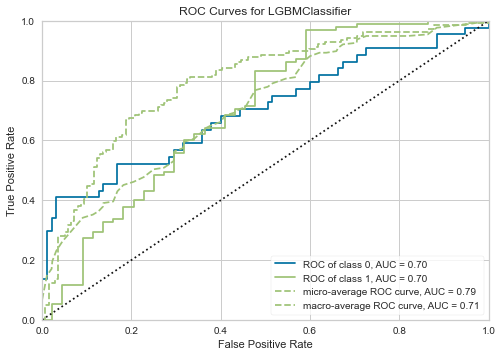

In [30]:
plot_model(tune_lgbm, plot="auc")

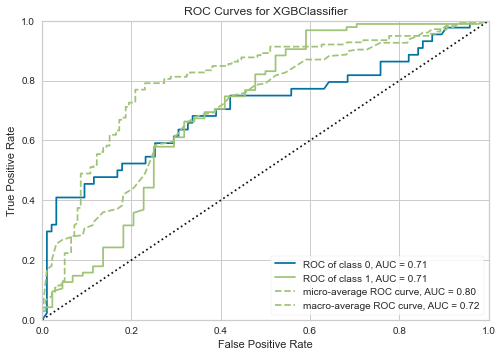

In [31]:
plot_model(tune_xgb, plot="auc")

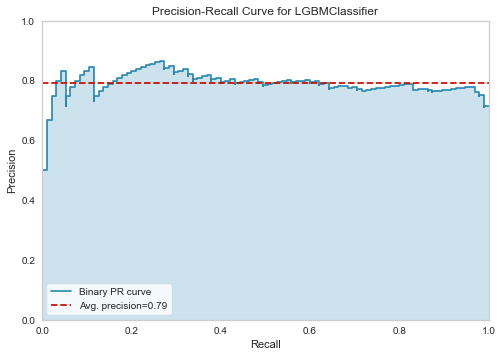

In [32]:
plot_model(tune_lgbm, plot = 'pr')

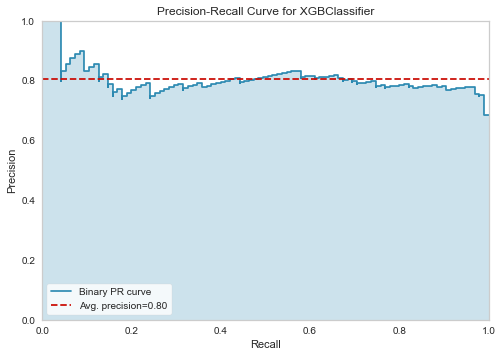

In [33]:
plot_model(tune_xgb, plot = 'pr')

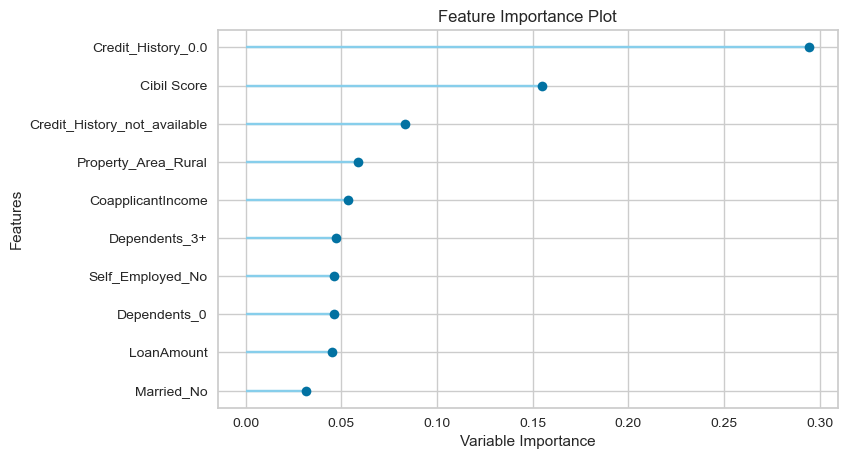

In [34]:
plot_model(tune_xgb, plot='feature')

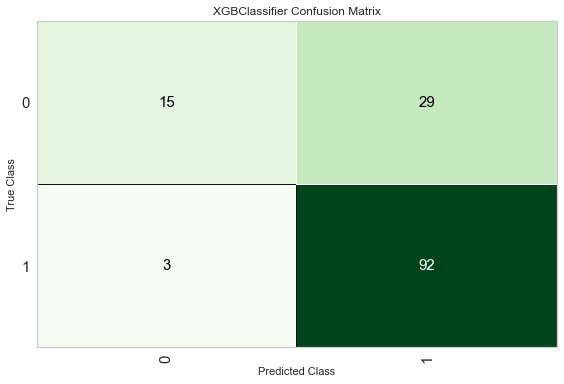

In [35]:
plot_model(tune_xgb, plot = 'confusion_matrix')

In [36]:
evaluate_model(tune_xgb)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [37]:
predict_model(tune_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7698,0.709,0.9684,0.7603,0.8519,0.3676,0.4285


,ApplicantIncome,CoapplicantIncome,LoanAmount,Cibil Score,Gender_Female,Gender_Male,Gender_not_available,Married_No,Married_Yes,Married_not_available,...,Loan_Amount_Term_not_available,Credit_History_0.0,Credit_History_1.0,Credit_History_not_available,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Label,Score
0,3200.0,700.0,70.000000,762.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Y,Y,0.6771
1,6045.0,0.0,115.000000,463.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,N,N,0.3372
2,8333.0,0.0,280.000000,767.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Y,Y,0.5852
3,8799.0,0.0,258.000000,389.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,N,N,0.4000
4,2526.0,1783.0,145.000000,804.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Y,Y,0.6515
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2400.0,3800.0,149.306306,714.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,N,Y,0.6668
135,4895.0,0.0,102.000000,578.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Y,Y,0.6692
136,2213.0,1125.0,149.306306,699.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Y,Y,0.6567
137,4354.0,0.0,136.000000,721.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Y,Y,0.6284


In [39]:
final_xgb = finalize_model(tune_xgb)

In [40]:
print(final_xgb)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.5, gamma=0,
              learning_rate=0.07, max_delta_step=0, max_depth=10,
              min_child_weight=1, missing=None, n_estimators=10, n_jobs=-1,
              nthread=None, objective='binary:logistic', random_state=123,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=0.3, verbosity=0)


In [41]:
predict_model(final_xgb)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Extreme Gradient Boosting,0.7914,0.8706,0.9684,0.7797,0.8638,0.4391,0.4903


,ApplicantIncome,CoapplicantIncome,LoanAmount,Cibil Score,Gender_Female,Gender_Male,Gender_not_available,Married_No,Married_Yes,Married_not_available,...,Loan_Amount_Term_not_available,Credit_History_0.0,Credit_History_1.0,Credit_History_not_available,Property_Area_Rural,Property_Area_Semiurban,Property_Area_Urban,Loan_Status,Label,Score
0,3200.0,700.0,70.000000,762.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Y,Y,0.6983
1,6045.0,0.0,115.000000,463.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,N,N,0.3227
2,8333.0,0.0,280.000000,767.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Y,Y,0.6188
3,8799.0,0.0,258.000000,389.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,1.0,N,N,0.4234
4,2526.0,1783.0,145.000000,804.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Y,Y,0.6139
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,2400.0,3800.0,149.306306,714.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,N,Y,0.5919
135,4895.0,0.0,102.000000,578.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,Y,Y,0.6565
136,2213.0,1125.0,149.306306,699.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,Y,Y,0.6637
137,4354.0,0.0,136.000000,721.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,Y,Y,0.5958


In [42]:


unseen_predictions = predict_model(final_xgb, data=data_unseen)
unseen_predictions.head()



,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Cibil Score,Property_Area,Loan_Status,Label,Score
0,Male,Yes,0,Graduate,No,2132,1591.0,96.0,360.0,1.0,733,Semiurban,Y,Y,0.7143
1,Male,Yes,0,Graduate,No,2425,2340.0,143.0,360.0,1.0,765,Semiurban,Y,Y,0.7132
2,Male,No,2,Graduate,No,4354,0.0,136.0,360.0,1.0,721,Rural,Y,Y,0.5958
3,Male,Yes,3+,Not Graduate,No,3850,983.0,100.0,360.0,1.0,701,Semiurban,Y,Y,0.6495
4,Male,Yes,3+,Graduate,No,5167,3167.0,200.0,360.0,1.0,855,Semiurban,Y,Y,0.6728


In [44]:
save_model(final_xgb,'Final XGB Model A112020')

Transformation Pipeline and Model Succesfully Saved
